# Importando as bibliotecas

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

# Importando os dados

Importando dados das cidades de Encantado, Muçum e Santa Tereza durante o período de 21/03/2024 às 23h30 a 22/03/2024 às 23h. Os dados podem ser baixados pelo link https://www.snirh.gov.br/hidrotelemetria/serieHistorica.aspx

In [11]:
url = "https://raw.githubusercontent.com/BusinessAnalyticsHub/Bootcamp_3ed/refs/heads/develop/Grupos%20Tarde/Grupo%202%20-%20RiverWatch%20Consultoria/encantado2023.csv"
dadosEncantado23 = pd.read_csv(url, header = 4, sep=';')

In [12]:
dadosEncantado23

,Data/Hora,Chuva Horária (mm),Nível adotado (cm),Vazão (m³/s),Bateria (V),Temp. Interna (ºC),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,22/03/2024 23:00,0.0,113.0,6.7,12.7,16.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22/03/2024 22:45,0.0,114.0,7.4,12.7,16.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22/03/2024 22:30,0.0,114.0,7.4,12.7,16.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22/03/2024 22:15,0.0,115.0,8.2,12.9,17.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22/03/2024 22:00,0.0,115.0,8.2,12.9,17.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29857,22/03/2023 00:15,0.0,145.0,43.2,12.4,28.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29858,22/03/2023 00:00,0.0,145.0,43.2,12.4,28.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29859,21/03/2023 23:45,0.0,145.0,43.2,12.4,28.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29860,21/03/2023 23:30,0.0,145.0,43.2,12.4,28.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Excluindo linhas e colunas totalmente nulas
dadosEncantado23 = dadosEncantado23.dropna(axis=1, how='all')
dadosEncantado23 = dadosEncantado23.drop(columns=['Bateria (V)','Temp. Interna (ºC)'])
dadosEncantado23 = dadosEncantado23.drop(29861)

In [14]:
# Alterando o nome das colunas
dadosEncantado23.columns = ['Data/Hora',
 'ChuvaEncantado',
 'NivelEncantado',
 'VazaoEncantado']

In [15]:
dadosEncantado23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29861 entries, 0 to 29860
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Data/Hora       29861 non-null  object 
 1   ChuvaEncantado  27399 non-null  float64
 2   NivelEncantado  27301 non-null  float64
 3   VazaoEncantado  26936 non-null  float64
dtypes: float64(3), object(1)
memory usage: 933.3+ KB


In [16]:
dadosEncantado23.isna().sum()

,0
Data/Hora,0
ChuvaEncantado,2462
NivelEncantado,2560
VazaoEncantado,2925


In [17]:
# Tratando o tipo dos dados
dadosEncantado23["Data/Hora"] = pd.to_datetime(dadosEncantado23["Data/Hora"], dayfirst=True)
dadosEncantado23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29861 entries, 0 to 29860
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data/Hora       29861 non-null  datetime64[ns]
 1   ChuvaEncantado  27399 non-null  float64       
 2   NivelEncantado  27301 non-null  float64       
 3   VazaoEncantado  26936 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 933.3 KB


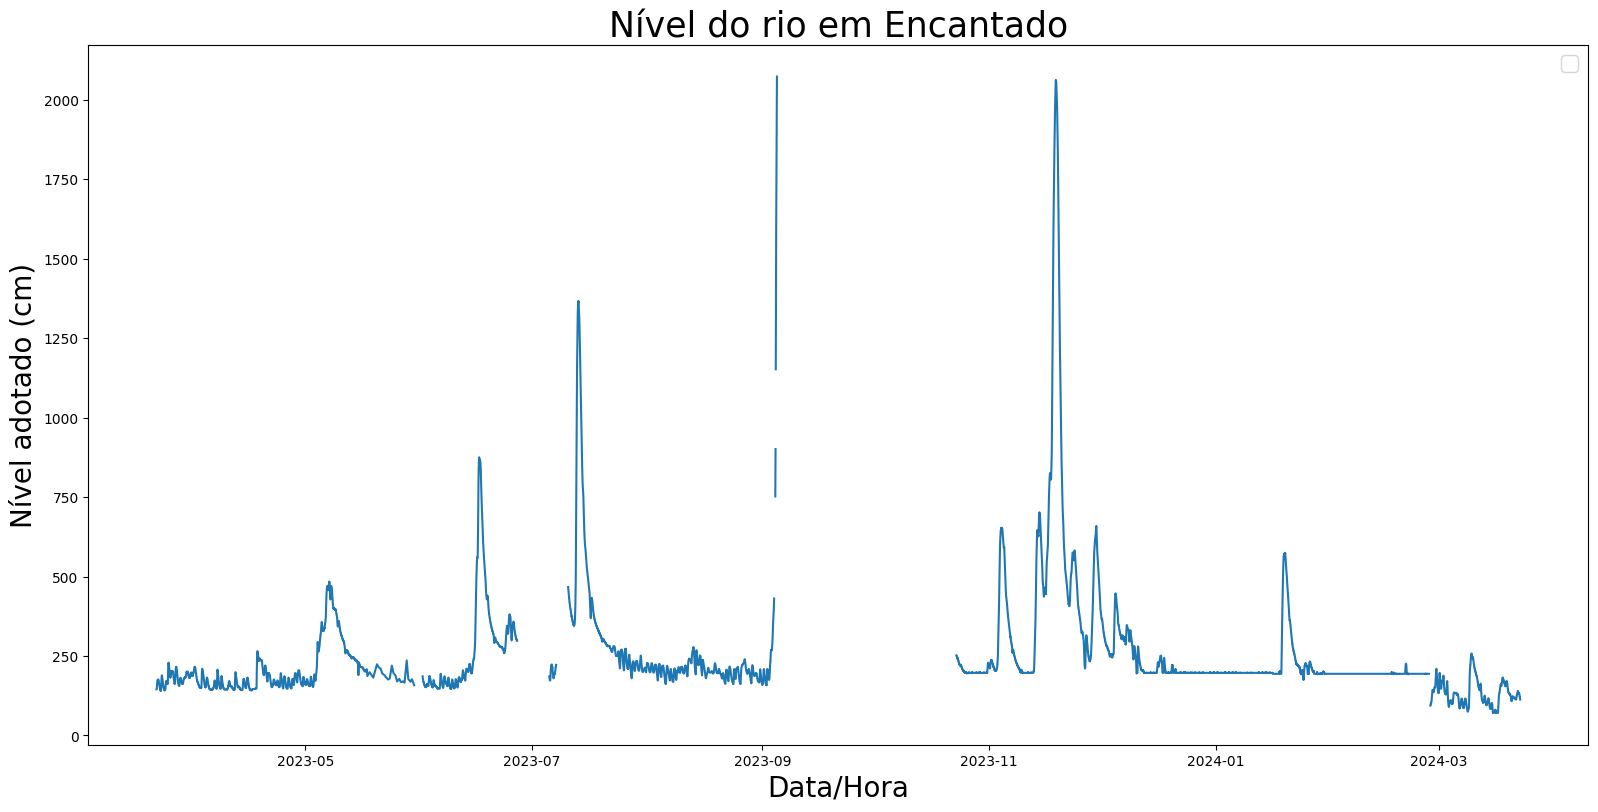

In [18]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(dadosEncantado23["Data/Hora"], dadosEncantado23["NivelEncantado"])

ax.set_title('Nível do rio em Encantado', fontsize=25)
ax.set_ylabel('Nível adotado (cm)', fontsize=20)
ax.set_xlabel('Data/Hora', fontsize=20)
ax.legend(fontsize='15')
ax=ax

In [19]:
url1 = 'https://raw.githubusercontent.com/BusinessAnalyticsHub/Bootcamp_3ed/refs/heads/develop/Grupos%20Tarde/Grupo%202%20-%20RiverWatch%20Consultoria/mucum2023.csv'
dadosMucum23 = pd.read_csv(url1, header = 4, sep=';')

In [20]:
dadosMucum23

,Data/Hora,Chuva Horária (mm),Nível adotado (cm),Vazão (m³/s),Bateria (V),Temp. Interna (ºC),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,22/03/2024 23:00,0.0,221.0,249.3,12.9,18.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22/03/2024 22:45,0.0,220.0,246.9,12.9,19.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22/03/2024 22:30,0.0,220.0,246.9,12.9,19.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22/03/2024 22:15,0.0,220.0,246.9,12.9,19.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22/03/2024 22:00,0.0,220.0,246.9,12.9,19.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34436,22/03/2023 00:00,0.0,115.0,63.5,12.4,25.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34437,21/03/2023 23:45,0.0,111.0,59.3,12.5,26.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34438,21/03/2023 23:30,0.0,107.0,55.2,12.5,26.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34439,21/03/2023 23:15,0.0,104.0,52.1,12.5,26.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Excluindo linhas e colunas totalmente nulas
dadosMucum23 = dadosMucum23.dropna(axis=1, how='all')
dadosMucum23 = dadosMucum23.drop([34440,34439])

In [22]:
dadosMucum23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34439 entries, 0 to 34438
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data/Hora           34439 non-null  object 
 1   Chuva Horária (mm)  34382 non-null  float64
 2   Nível adotado (cm)  34072 non-null  float64
 3   Vazão (m³/s)        34072 non-null  float64
 4   Bateria (V)         32639 non-null  float64
 5   Temp. Interna (ºC)  32639 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.6+ MB


In [23]:
# Alterando o nome das colunas
dadosMucum23.drop(columns=['Bateria (V)','Temp. Interna (ºC)'], inplace=True)
dadosMucum23.columns = ['Data/Hora',
 'ChuvaMucum',
 'NivelMucum',
 'VazaoMucum']

In [24]:
dadosMucum23.isna().sum()

,0
Data/Hora,0
ChuvaMucum,57
NivelMucum,367
VazaoMucum,367


In [25]:
# Tratando o tipo dos dados
dadosMucum23["Data/Hora"] = pd.to_datetime(dadosMucum23["Data/Hora"], dayfirst=True)
dadosMucum23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34439 entries, 0 to 34438
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data/Hora   34439 non-null  datetime64[ns]
 1   ChuvaMucum  34382 non-null  float64       
 2   NivelMucum  34072 non-null  float64       
 3   VazaoMucum  34072 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.1 MB


In [26]:
url2 = 'https://raw.githubusercontent.com/BusinessAnalyticsHub/Bootcamp_3ed/refs/heads/develop/Grupos%20Tarde/Grupo%202%20-%20RiverWatch%20Consultoria/joseJulio2023.csv'
dadosJJ23 = pd.read_csv(url2, header = 4, sep=';')

In [27]:
dadosJJ23

,Data/Hora,Chuva Horária (mm),Nível adotado (cm),Vazão (m³/s),Bateria (V),Temp. Interna (ºC),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,22/03/2024 23:00,0.0,355.0,222.0,12.6,16.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,22/03/2024 22:45,0.0,356.0,224.0,12.6,16.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22/03/2024 22:30,0.0,355.0,222.0,12.6,16.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22/03/2024 22:15,0.0,356.0,224.0,12.6,16.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22/03/2024 22:00,0.0,355.0,222.0,12.6,16.9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32304,22/03/2023 00:15,0.0,279.0,93.3,12.7,24.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32305,22/03/2023 00:00,0.0,279.0,93.3,12.7,24.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32306,21/03/2023 23:45,0.0,279.0,93.3,12.7,24.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32307,21/03/2023 23:30,0.0,279.0,93.3,12.7,24.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Excluindo linhas e colunas totalmente nulas
dadosJJ23 = dadosJJ23.dropna(axis=1, how='all')
dadosJJ23 = dadosJJ23.drop([32308])

In [29]:
# Alterando o nome das colunas
dadosJJ23.drop(columns=['Bateria (V)','Temp. Interna (ºC)'], inplace=True)
dadosJJ23.columns = ['Data/Hora',
 'ChuvaJJ',
 'NivelJJ',
 'VazaoJJ']

In [30]:
# Tratando o tipo dos dados
dadosJJ23["Data/Hora"] = pd.to_datetime(dadosJJ23["Data/Hora"], dayfirst=True)
dadosJJ23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32308 entries, 0 to 32307
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Data/Hora  32308 non-null  datetime64[ns]
 1   ChuvaJJ    32217 non-null  float64       
 2   NivelJJ    32070 non-null  float64       
 3   VazaoJJ    32070 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1009.8 KB


In [31]:
# Merge the first two DataFrames
intermediate_df = pd.merge(dadosEncantado23, dadosMucum23, how='inner', on='Data/Hora')

# Merge the intermediate DataFrame with the third DataFrame
dados = pd.merge(intermediate_df, dadosJJ23, how='inner', on='Data/Hora')

In [32]:
dados_semDH = dados.drop(columns=['Data/Hora'])

Text(0.5, 1.0, 'Correlation Map')

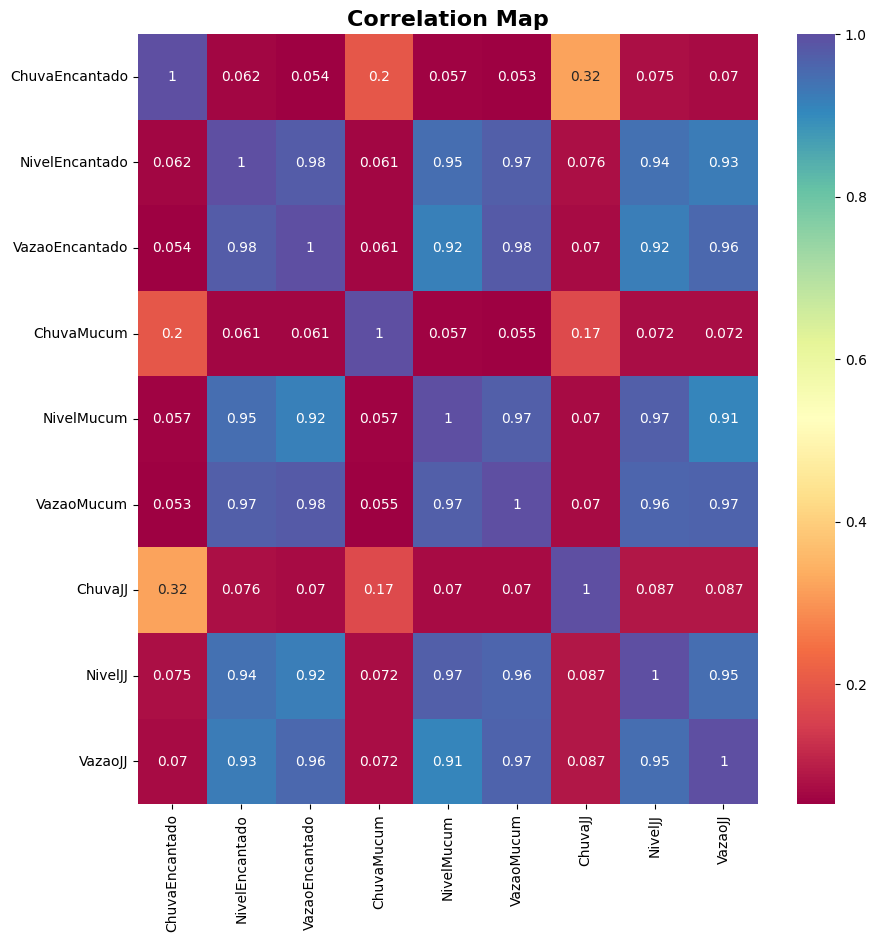

In [33]:
# Calculando a matriz de correlação e o mapa de calor
corr = dados_semDH.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,cmap=sns.color_palette("Spectral", as_cmap=True), annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

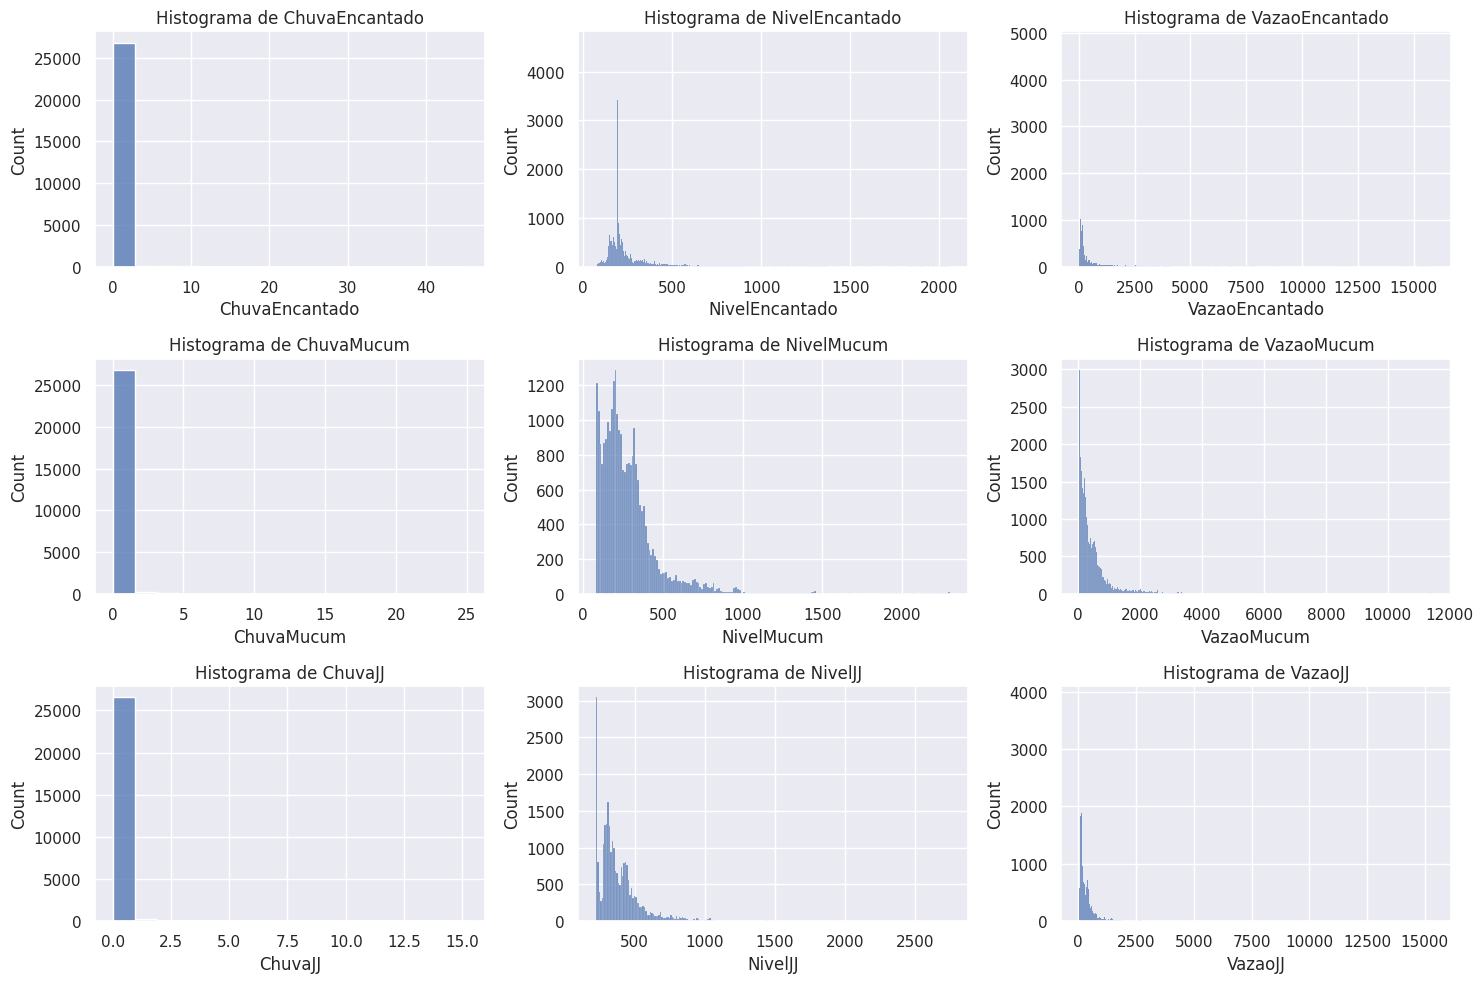

In [34]:
sns.set(style="darkgrid")

def cria_hist(df):
  # Configuração da figura com layout 3x3
  fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # 3x3 grid

  # Gera os histogramas para as nove colunas
  for i, col in enumerate(df.columns):
      row, col_idx = divmod(i, 3)
      sns.histplot(df[col], ax=axes[row, col_idx])
      axes[row, col_idx].set_title(f'Histograma de {col}')

  # Ajusta os espaçamentos
  plt.tight_layout()
  plt.show()

cria_hist(dados_semDH)

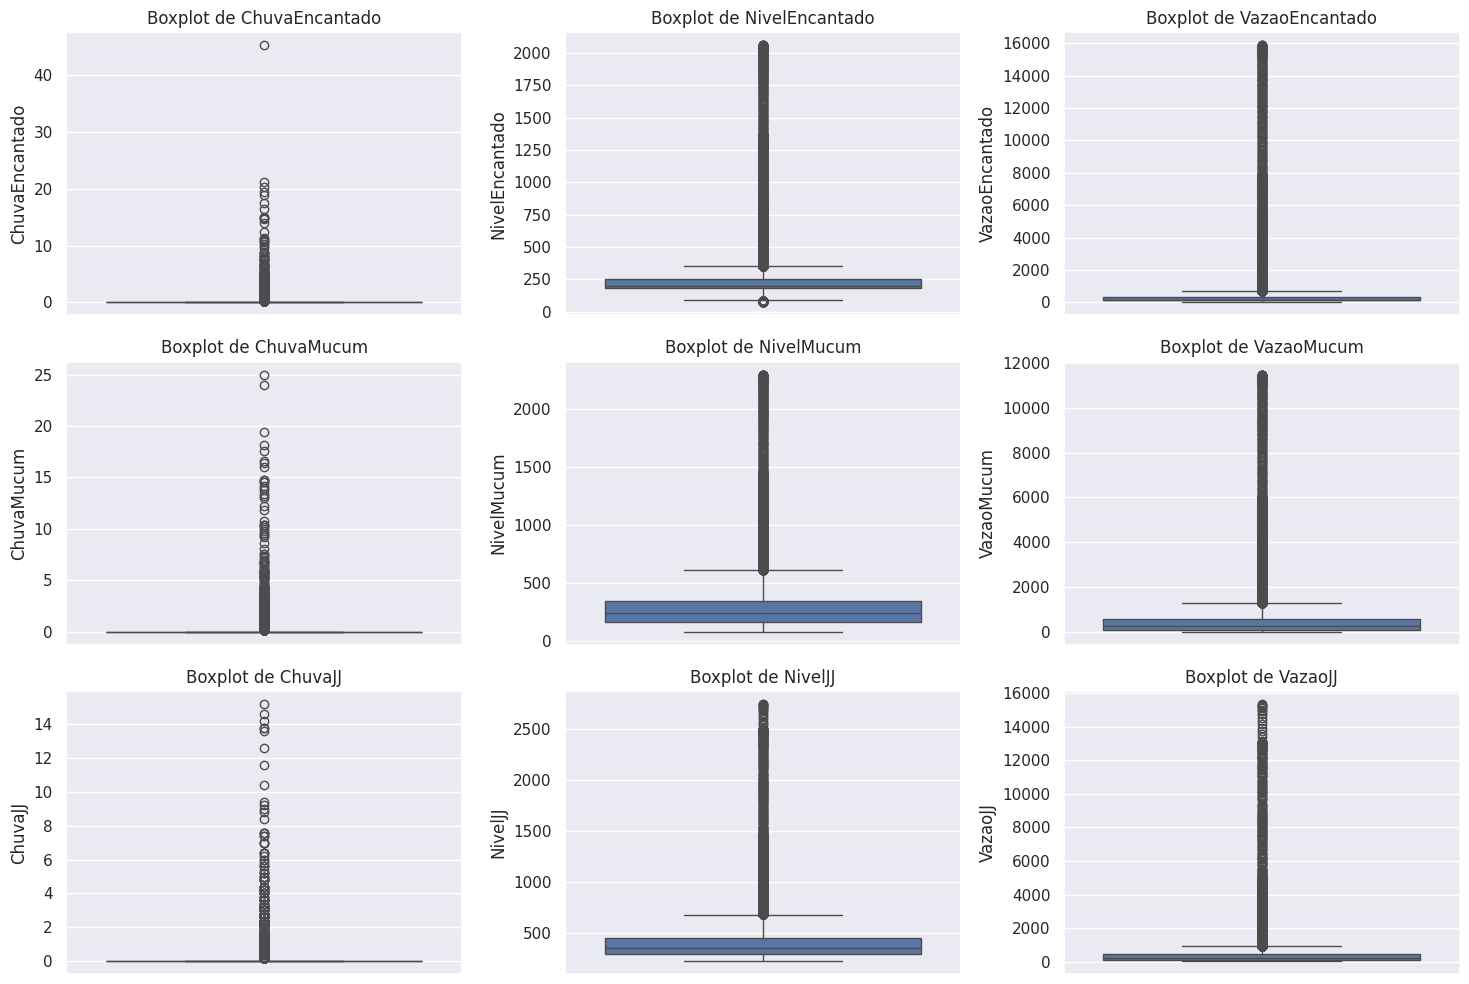

In [35]:
def cria_boxplot(df):
  # Configuração da figura com layout 3x3
  fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # 3x3 grid

  # Gera os histogramas para as nove colunas
  for i, col in enumerate(df.columns):
      row, col_idx = divmod(i, 3)
      sns.boxplot(df[col], ax=axes[row, col_idx])
      axes[row, col_idx].set_title(f'Boxplot de {col}')

  # Ajusta os espaçamentos
  plt.tight_layout()
  plt.show()

cria_boxplot(dados_semDH)

In [36]:
dados_semDH.describe()

,ChuvaEncantado,NivelEncantado,VazaoEncantado,ChuvaMucum,NivelMucum,VazaoMucum,ChuvaJJ,NivelJJ,VazaoJJ
count,26982.000000,26884.000000,26519.000000,27114.000000,27114.000000,27114.000000,27060.000000,26909.000000,26909.000000
mean,0.067578,256.219052,518.766032,0.071513,292.618573,563.025607,0.056888,405.578654,443.352975
std,0.613849,195.480188,1321.344298,0.604031,229.140300,989.747810,0.427641,225.059543,1002.519779
min,0.000000,71.000000,0.100000,0.000000,79.000000,29.700000,0.000000,223.000000,30.000000
25%,0.000000,185.000000,121.900000,0.000000,164.000000,131.100000,0.000000,291.000000,110.500000
50%,0.000000,197.000000,146.100000,0.000000,238.000000,290.800000,0.000000,348.000000,208.300000
75%,0.000000,251.000000,354.200000,0.000000,342.000000,596.900000,0.000000,447.000000,427.900000
max,45.200000,2061.000000,15881.200000,25.000000,2302.000000,11465.600000,15.200000,2751.000000,15364.000000


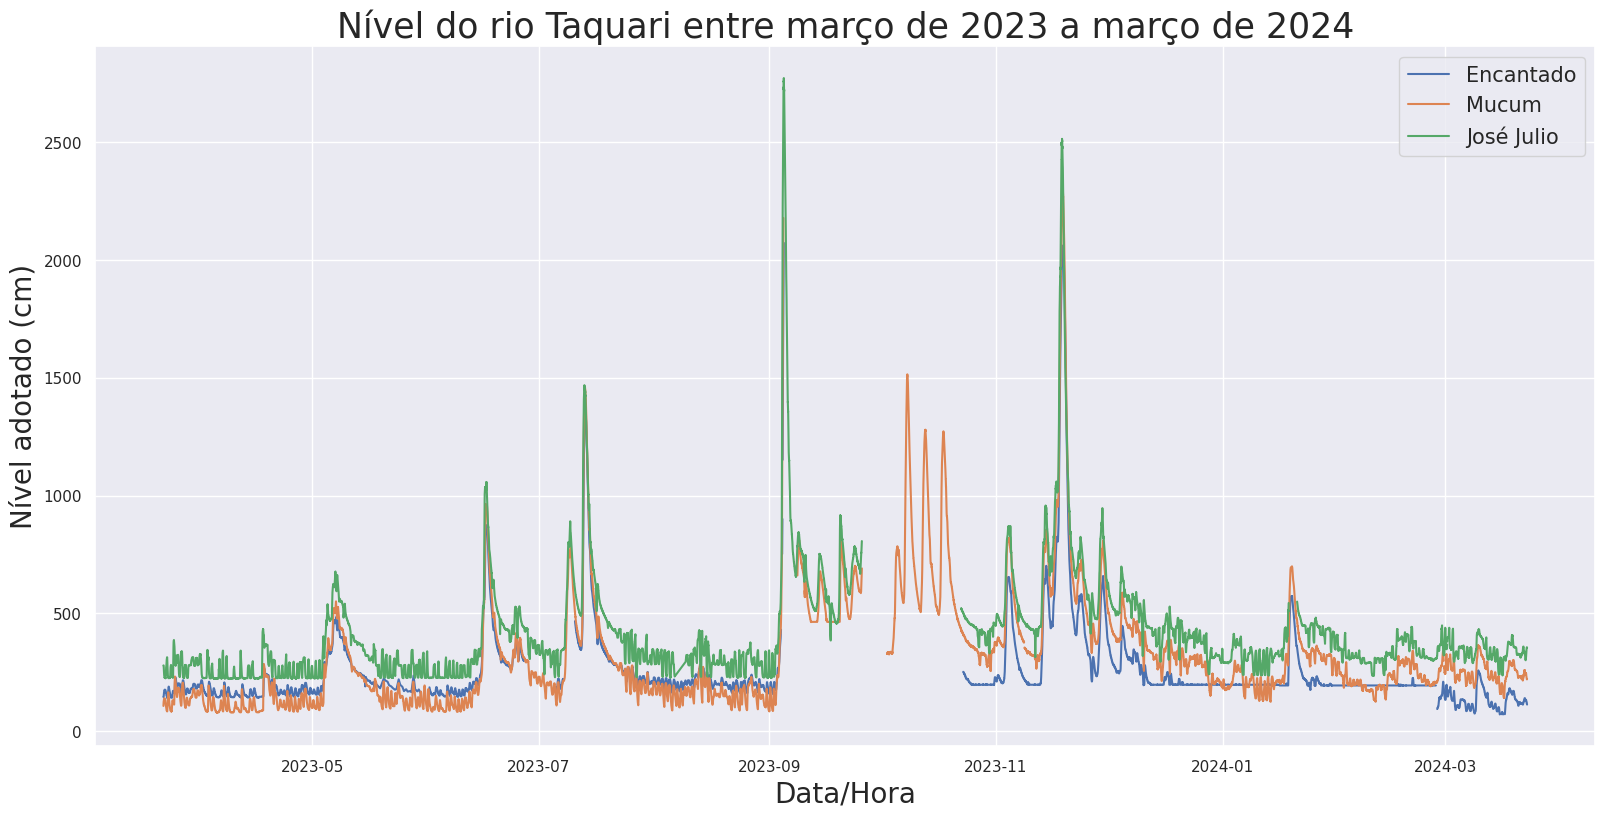

In [37]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(dadosEncantado23["Data/Hora"], dadosEncantado23["NivelEncantado"], label="Encantado")
ax.plot(dadosMucum23["Data/Hora"], dadosMucum23["NivelMucum"], label="Mucum")
ax.plot(dadosJJ23["Data/Hora"], dadosJJ23["NivelJJ"], label="José Julio")

ax.set_title('Nível do rio Taquari entre março de 2023 a março de 2024', fontsize=25)
ax.set_ylabel('Nível adotado (cm)', fontsize=20)
ax.set_xlabel('Data/Hora', fontsize=20)
ax.legend(fontsize='15')
ax=ax

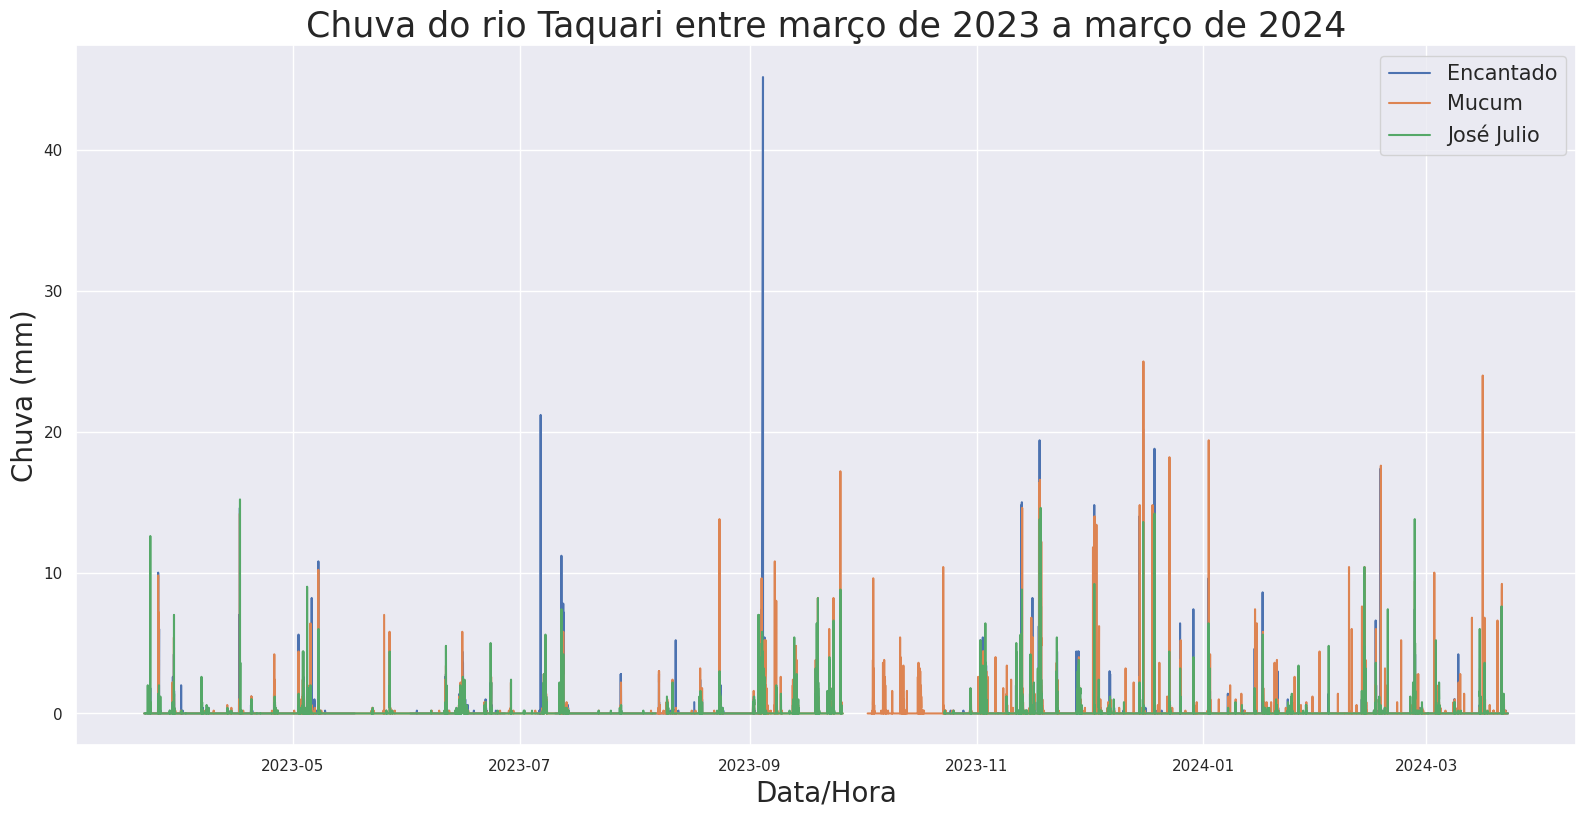

In [38]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(dadosEncantado23["Data/Hora"], dadosEncantado23["ChuvaEncantado"], label="Encantado")
ax.plot(dadosMucum23["Data/Hora"], dadosMucum23["ChuvaMucum"], label="Mucum")
ax.plot(dadosJJ23["Data/Hora"], dadosJJ23["ChuvaJJ"], label="José Julio")

ax.set_title('Chuva do rio Taquari entre março de 2023 a março de 2024', fontsize=25)
ax.set_ylabel('Chuva (mm)', fontsize=20)
ax.set_xlabel('Data/Hora', fontsize=20)
ax.legend(fontsize='15')
ax=ax